# 8.8.5. SVM 실습

In [1]:
'''1. 데이터 불러오기'''

from sklearn import datasets
raw_wine = datasets.load_wine()

In [2]:
'''2. feature data, target data 지정'''

X = raw_wine.data
y = raw_wine.target

In [3]:
'''3. training data / test data 분할'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0) 

In [4]:
'''4. 데이터 표준화'''

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()                       # 표준화 스케일러를 설정
std_scale.fit(X_train)                             # 메서드를 이용하여 실제로 자료를 반환
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [5]:
'''5. 데이터 학습 (Train)'''

from sklearn import svm
clf_svm_lr = svm.SVC(kernel='linear', random_state=0)   # 분류문제: SVC , 회귀문제: SVR / 커널 종류: linear, poly, rbf, sigmoid, precomputed
clf_svm_lr.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=0)

In [6]:
'''6. 데이터 예측 (Predict)'''

pred_svm = clf_svm_lr.predict(X_test_std)
print(pred_svm)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [7]:
'''7. 정확도 평가'''

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred_svm)
print(accuracy)

1.0


In [8]:
'''8. Confusion Matrix 확인'''

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred_svm)
print(conf_matrix)

[[16  0  0]
 [ 0 21  0]
 [ 0  0  8]]


In [9]:
'''9. 분류 리포트 확인'''

from sklearn.metrics import classification_report
class_report = classification_report(y_test, pred_svm)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



---
---

# 8.9. 크로스 밸리데이션 실습

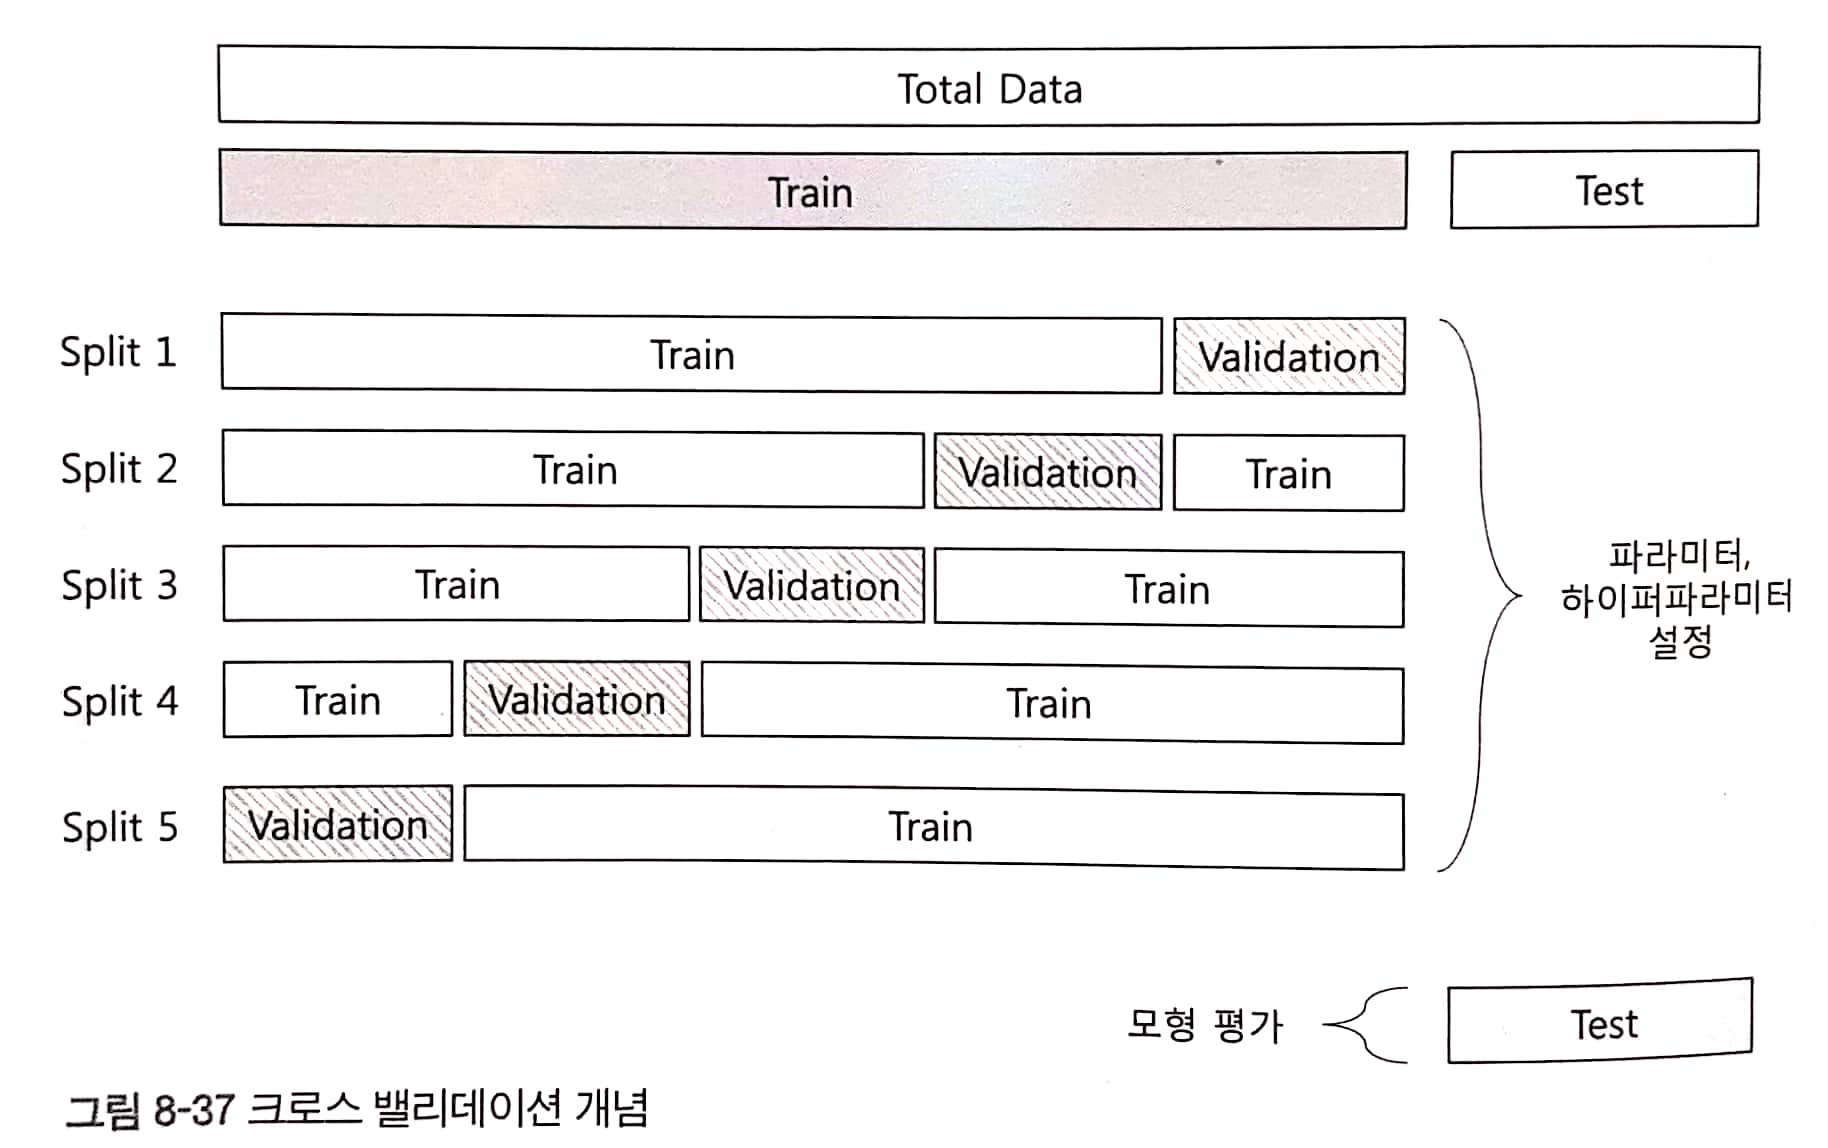

In [ ]:
'''1. 데이터 불러오기'''

from sklearn import datasets
raw_wine = datasets.loads_wine()

In [ ]:
'''2. feature data, target data 지정'''

X = raw_wine.data
y = raw_wine.target

In [ ]:
'''3. training data/test data 분할'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [ ]:
'''4. 데이터 표준화'''

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [ ]:
'''5. 그리드 서치'''

from sklearn import svm
# Stratified k-fold cross validation는 k-fold cross validation와는 달리 
# 라벨링의 비율을 유지하면서 데이터를 추출하는 방법 
from sklearn.model_selection import StratifiedKFold
# GridSearchCV: 그리드서치
from sklearn.model_selection import GridSearchCV

# SVM의 kernel은 linear 또는 rbf로 설정
param_grid = {'kernel':('linear','rbf'), 'C':[0.5,1,10,100]}
# n_splits=5는 트레이닝 데이터를 5개의 split으로 나눔, suhffle=True는 데이터를 섞음
kfold = StratifiedKFold(n_splits=5, suhffle=True, random_state=0)

# 학습시킬 기본 모형을 설정
svc = svm.SVC(random_state=0)
# 학습시킬 모형 svc와 파라미터 param_grid, 크로스 밸리데이션 방법 kfold, 모형 평가 방법 설정
grid_cv = GridSearchCV(svc, param_grid, cv=kfold, scoring='accuracy')
grid_cv.fit(X_train_std, y_train)

In [ ]:
'''6. 그리드 서치 결과 확인'''



In [ ]:
'''7. 그리드 서치 결과 확인(데이터 프레임)'''



In [ ]:
'''8. 베스트 스코어 & 하이퍼파라미터'''



In [ ]:
'''9. 최종 모형'''



In [ ]:
'''10. 크로스 밸리데이션 스코어 확인(1)'''



In [ ]:
'''11. 크로스 밸리데이션 스코어 확인(2)'''



In [ ]:
'''12. 예측'''



In [ ]:
'''13. 정확도'''



In [ ]:
'''14. Confusion Matrix'''



In [ ]:
'''15. 분류 리포트 확인'''



### * sklearn 전처리: 
https://notebook.community/kimkipyo/dss_git_kkp/%ED%86%B5%EA%B3%84,%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EB%B3%B5%EC%8A%B5/160601%EC%88%98_11%EC%9D%BC%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC%20Data%20Preprocessing,%20(%EA%B2%B0%EC%A0%95%EB%A1%A0%EC%A0%81)%EC%84%A0%ED%98%95%20%ED%9A%8C%EA%B7%80%20%EB%B6%84%EC%84%9D%20Linear%20Regression%20Analysis/1.Scikit-Learn%EC%9D%98%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5